In [1]:
import numpy as np
import pandas as pd

In [2]:
grid_alpha = np.arange(0.80,0.951,0.05)
grid_lambda = np.arange(0.1,0.41,0.05)
grid_probability = np.arange(0.05,0.251,0.05)
grid_riskloading = np.arange(1.6,2.81,0.1)

In [3]:
parameters = {'α':[], 'λ':[], 'p':[], 'τ':[], 'RiskPremium':[], 'T1':[], 'T2':[], 'CVaR':[]}
for α in np.round(grid_alpha, 2).astype('str'):
    for λ in np.round(grid_lambda, 2).astype('str'):
        for p in np.round(grid_probability, 2).astype('str'):
            for τ in np.round(grid_riskloading, 2).astype('str'):
                parameters['α'].append(α)
                parameters['λ'].append(λ)
                parameters['p'].append(p)
                parameters['τ'].append(τ)
                parameters['RiskPremium'].append(pd.read_csv(f"Experiment_{α}_{λ}_{p}_{τ}.csv")[['RiskPremium', 'T1', 'T2', 'CVaR']].iloc[1,0])
                parameters['T1'].append(pd.read_csv(f"Experiment_{α}_{λ}_{p}_{τ}.csv")[['RiskPremium', 'T1', 'T2', 'CVaR']].iloc[1,1])
                parameters['T2'].append(pd.read_csv(f"Experiment_{α}_{λ}_{p}_{τ}.csv")[['RiskPremium', 'T1', 'T2', 'CVaR']].iloc[1,2])
                parameters['CVaR'].append(pd.read_csv(f"Experiment_{α}_{λ}_{p}_{τ}.csv")[['RiskPremium', 'T1', 'T2', 'CVaR']].iloc[1,3])

In [4]:
results = pd.DataFrame(parameters)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='RiskPremium', ylabel='CVaR'>

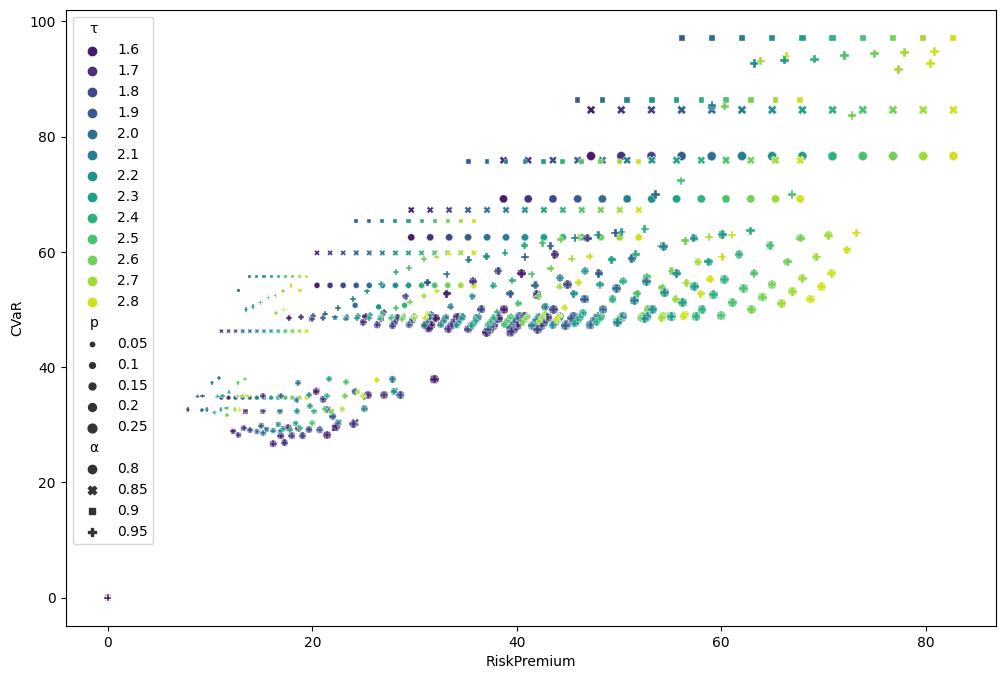

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=results['RiskPremium'], y=results['CVaR'],
                hue=results['τ'], style=results['α'], size=results['p'], palette='viridis', sizes=(40,10))

In [17]:
results.astype('float')

,α,λ,p,τ,RiskPremium,T1,T2,CVaR
0,0.80,0.1,0.05,1.6,11.104116,63.654534,119.672341,34.700364
1,0.80,0.1,0.05,1.7,11.798124,63.654534,119.672341,34.700364
2,0.80,0.1,0.05,1.8,12.492131,63.654534,119.672341,34.700364
3,0.80,0.1,0.05,1.9,13.186138,63.654534,119.672341,34.700364
4,0.80,0.1,0.05,2.0,13.880146,63.654534,119.672341,34.700364
...,...,...,...,...,...,...,...,...
1815,0.95,0.4,0.25,2.4,57.538737,48.839014,48.839014,48.839014
1816,0.95,0.4,0.25,2.5,59.981475,48.924203,48.924203,48.924203
1817,0.95,0.4,0.25,2.6,62.967659,50.033627,50.033627,50.033627
1818,0.95,0.4,0.25,2.7,65.925485,51.061639,51.061639,51.061639


In [25]:
results['p'].value_counts()

0.05    364
0.1     364
0.15    364
0.2     364
0.25    364
Name: p, dtype: int64

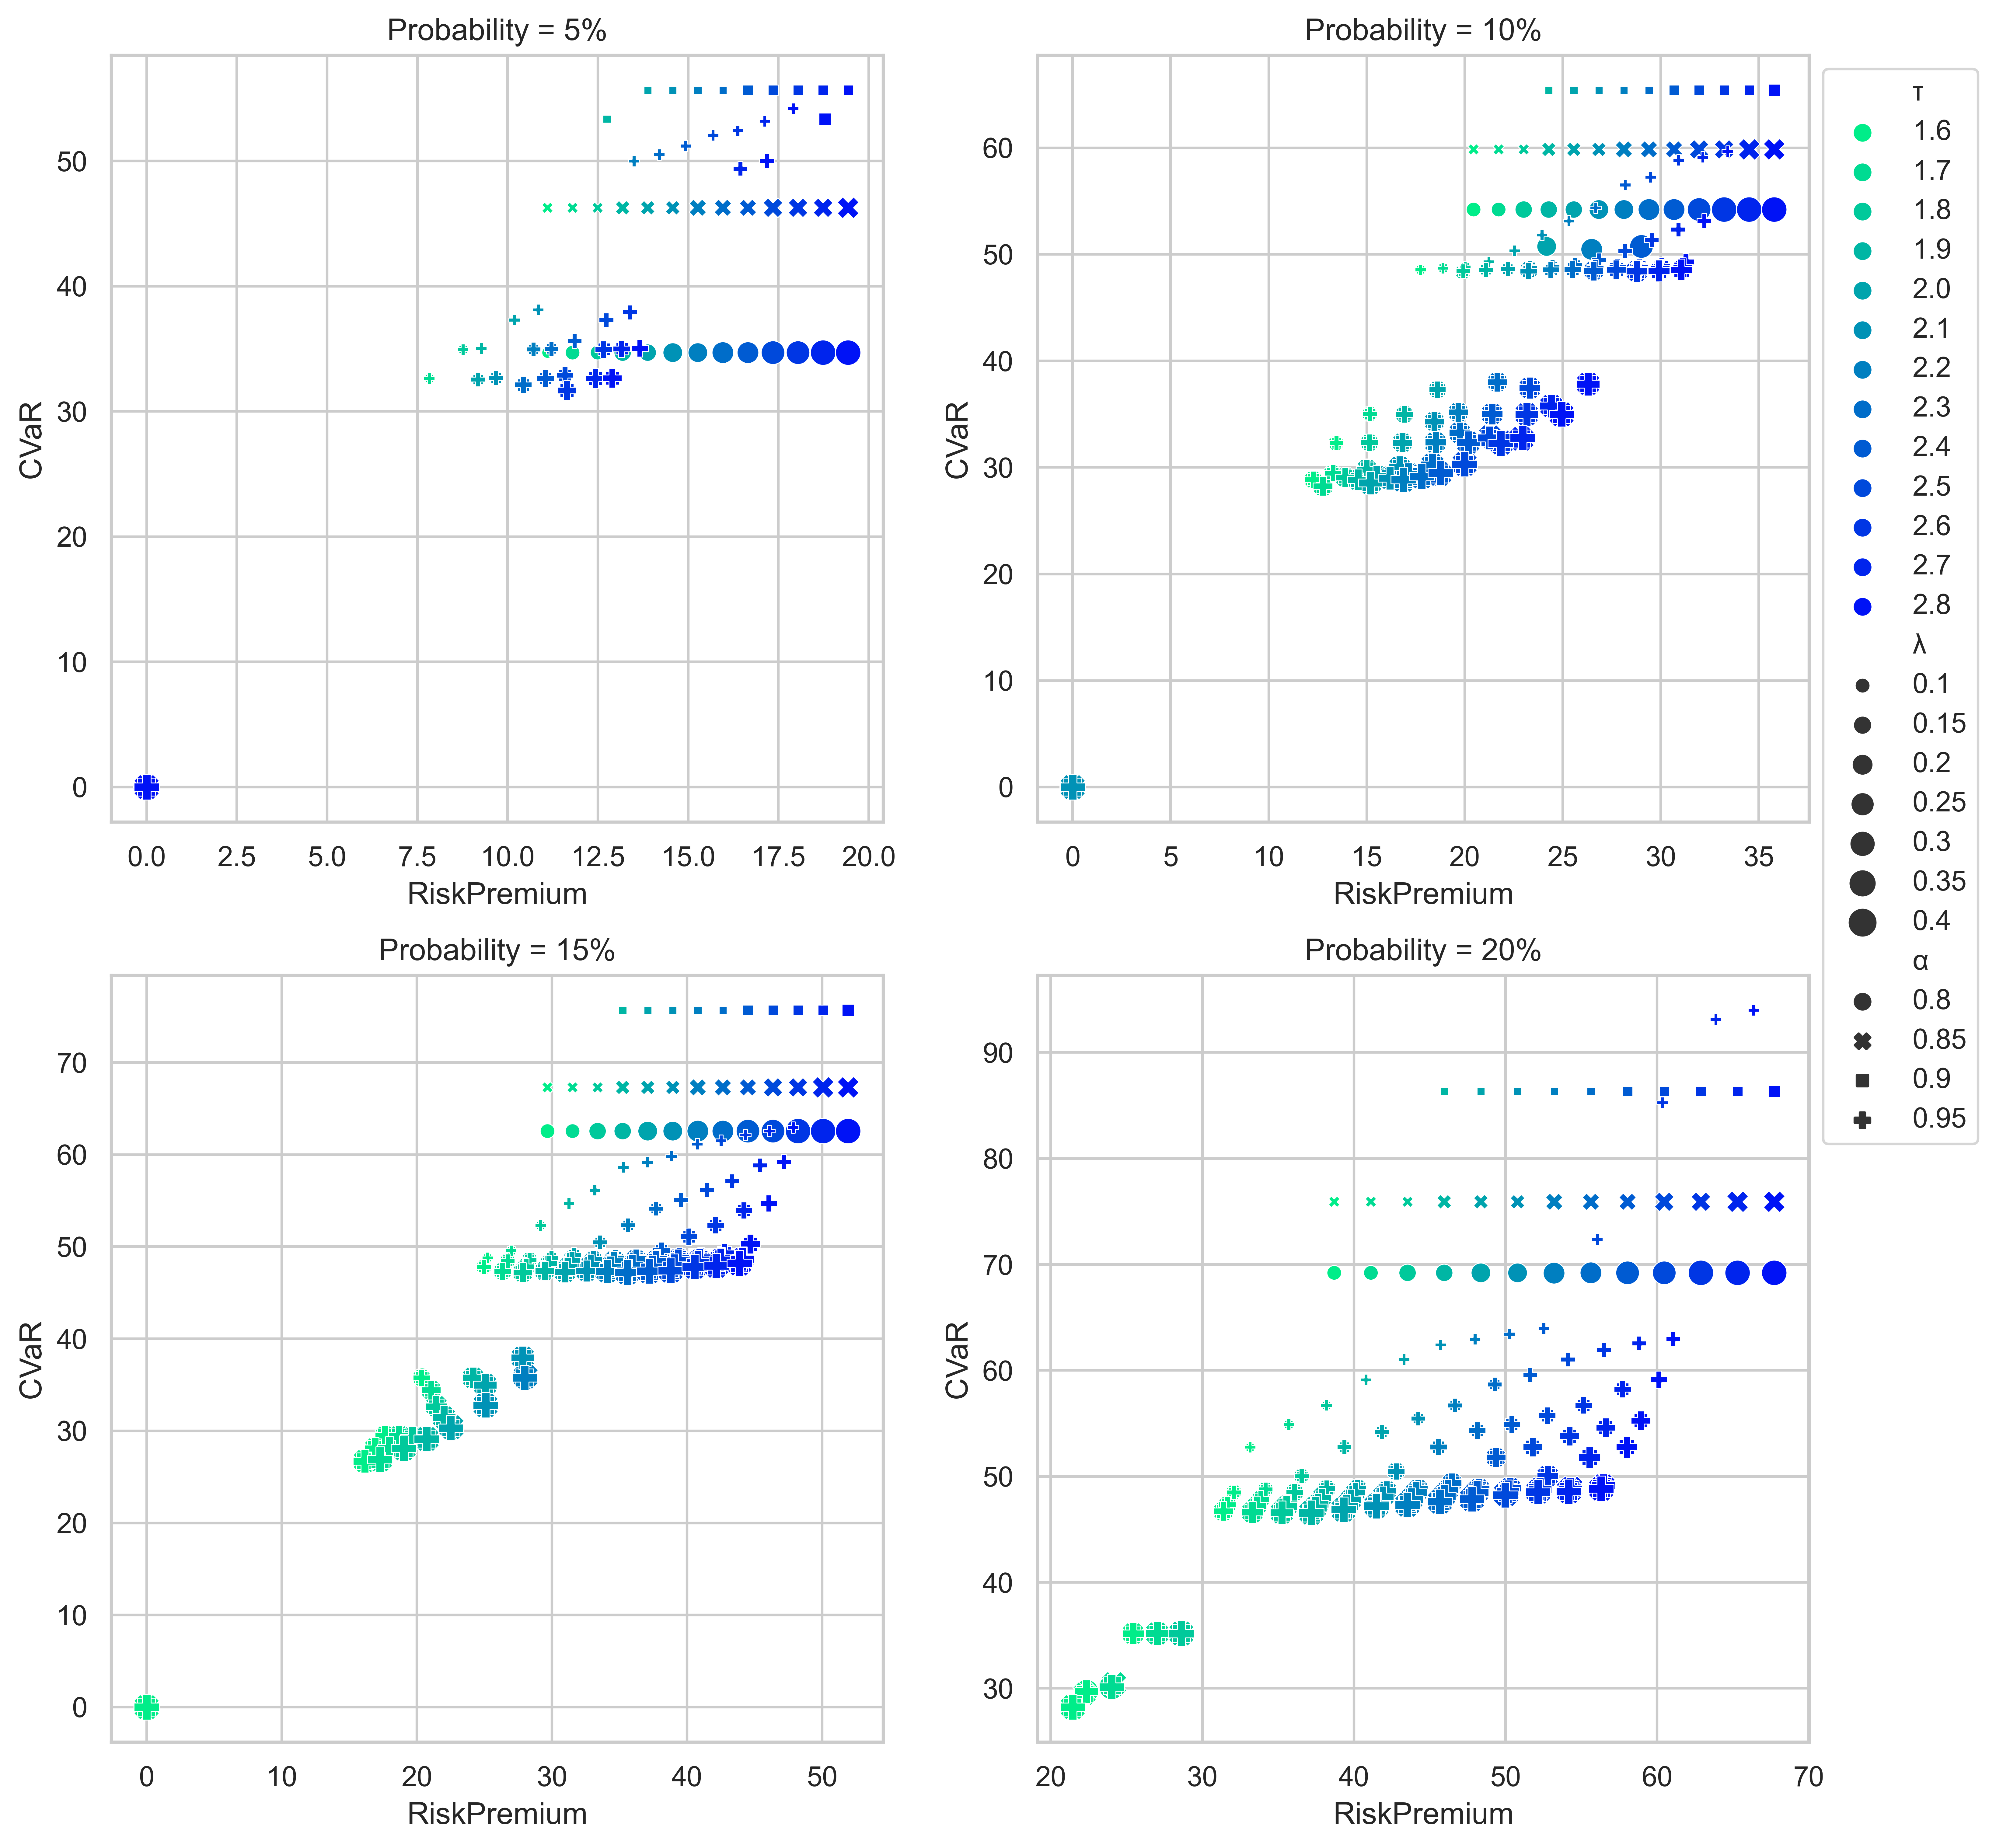

In [54]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(2,2, figsize=(12,12))
palette = 'winter_r'
sizes = (100,20)
sns.scatterplot(data=results.loc[results['p']=="0.05"], x='RiskPremium', y='CVaR',
                hue='τ', style='α', size='λ', palette=palette, sizes=sizes, ax=axs[0,0], legend=False)
sns.scatterplot(data=results.loc[results['p']=="0.1"], x='RiskPremium', y='CVaR',
                hue='τ', style='α', size='λ', palette=palette, sizes=sizes, ax=axs[0,1], legend=True)
sns.move_legend(axs[0,1], "upper left", bbox_to_anchor=(1, 1))
sns.scatterplot(data=results.loc[results['p']=="0.15"], x='RiskPremium', y='CVaR',
                hue='τ', style='α', size='λ', palette=palette, sizes=sizes, ax=axs[1,0], legend=False)
sns.scatterplot(data=results.loc[results['p']=="0.2"], x='RiskPremium', y='CVaR',
                hue='τ', style='α', size='λ', palette=palette, sizes=sizes, ax=axs[1,1], legend=False)

axs[0,0].set_title('Probability = 5%')
axs[0,1].set_title('Probability = 10%')
axs[1,0].set_title('Probability = 15%')
axs[1,1].set_title('Probability = 20%')

sns.set(rc={"figure.dpi": 600, 'savefig.dpi': 600})
plt.savefig('results.png')